In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df=pd.read_csv("height-weight.csv")

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

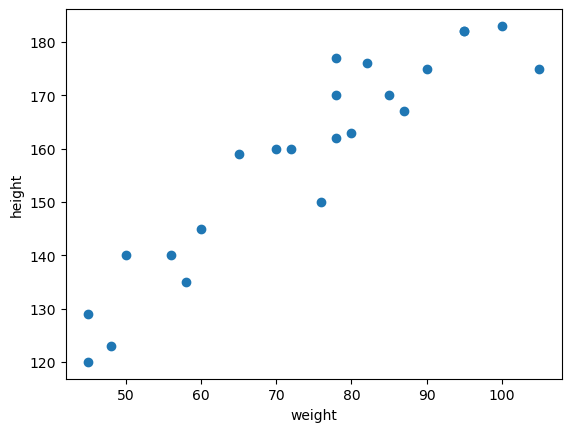

In [6]:

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")


In [7]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


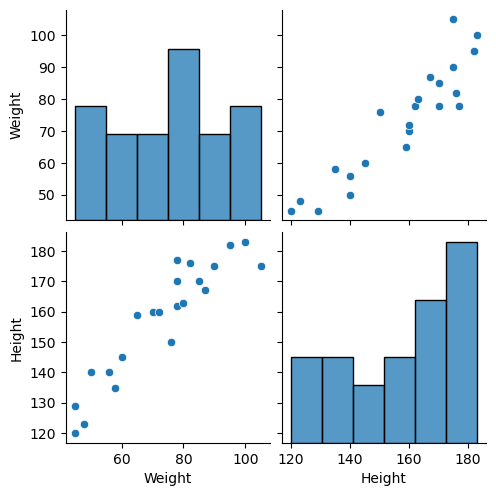

In [10]:
import seaborn as sns
sns.pairplot(df)


In [21]:
##independent and dependent features
X=df[['Weight']] ##independent features should be 2D array OR DF
np.array(X).shape


(23, 1)

In [13]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [14]:
y=df['Height'] ##dependent variable 1d
np.array(y).shape

(23,)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [24]:
X_train.shape

(17, 1)

In [25]:
##standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [26]:
X_test=scaler.transform(X_test)

In [27]:
X_test

array([[ 1.46816037],
       [-0.57763687],
       [ 0.70829282],
       [-0.28538012],
       [-0.98679631],
       [-1.74666386]])

In [32]:
##apply linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [34]:
print("coefficient or slope:",reg.coef_)
print("intercept:",reg.intercept_)

coefficient or slope: [17.74797363]
intercept: 159.41176470588235


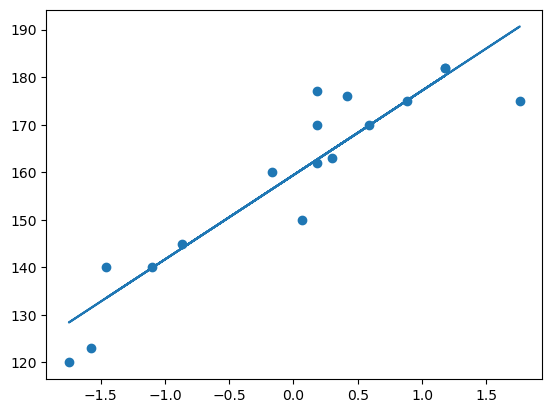

In [36]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train))

In [38]:
##prediction for test best fit line
y_pred=reg.predict(X_test)

In [39]:
##perfromance Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

34.60595855099189
5.071757617313722
5.882682938166215


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.8983920962535105


In [42]:
##OLS lINEAR REGRESSION
import statsmodels.api as sm


In [43]:
model=sm.OLS(y_train,X_train).fit()

In [44]:
prediction=model.predict(X_test)
print(prediction)



[ 26.05687151 -10.25188387  12.57076237  -5.06491882 -17.51363495
 -30.99974409]


In [46]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1979
Date:                Thu, 05 Feb 2026   Prob (F-statistic):                       0.662
Time:                        15:58:42   Log-Likelihood:                         -110.36
No. Observations:                  17   AIC:                                      222.7
Df Residuals:                      16   BIC:                                      223.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
reg.predict(scaler.transform([[34]]))

C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([117.0006975])